In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv("1._Regression_-_Module_-_(Housing_Prices)[1].csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [10]:
data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


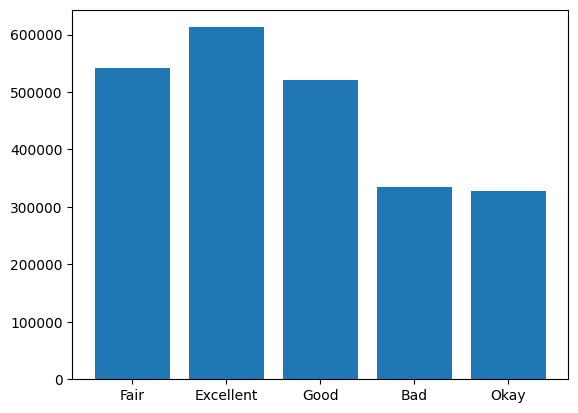

In [12]:
# Normal way to compare two different types of variable
data['Condition_sale'] = 0
for i in data['Condition of the House'].unique():
    data['Condition_sale'][data['Condition of the House'] == str(i)] = data['Sale Price'][data['Condition of the House'] == str(i)].mean()
plt.figure(dpi=100)
plt.bar(data['Condition of the House'].unique(), data['Condition_sale'].unique())
plt.show()

In [13]:
Zip_condition_sale= data.groupby(['Condition of the House', 'Zipcode'])['Sale Price'].mean()

In [16]:
Zip_condition_sale

Condition of the House  Zipcode
Bad                     98004.0    1.500000e+06
                        98006.0    3.725000e+05
                        98011.0    2.700000e+05
                        98023.0    1.500000e+05
                        98024.0    1.420000e+05
                                       ...     
Okay                    98155.0    3.601833e+05
                        98166.0    2.165625e+05
                        98168.0    1.809389e+05
                        98178.0    1.750000e+05
                        98198.0    2.705325e+05
Name: Sale Price, Length: 283, dtype: float64

In [18]:
zip_condition_sale = pd.pivot_table(data, index= ['Condition of the House','Zipcode'],values = ['Sale Price'], aggfunc = np.mean)
zip_condition_sale

Sale Price
Condition of the House Zipcode              
Bad                    98004.0  1.500000e+06
                       98006.0  3.725000e+05
                       98011.0  2.700000e+05
                       98023.0  1.500000e+05
                       98024.0  1.420000e+05
...                                      ...
Okay                   98155.0  3.601833e+05
                       98166.0  2.165625e+05
                       98168.0  1.809389e+05
                       98178.0  1.750000e+05
                       98198.0  2.705325e+05

[283 rows x 1 columns]

In [29]:
zip_condition_sale2 = pd.pivot_table(data, index = ['Zipcode'], columns = ['Condition of the House'], values = ['Sale Price'], aggfunc = np.mean)
zip_condition_sale2

Sale Price                                            \
Condition of the House        Bad     Excellent          Fair          Good   
Zipcode                                                                       
98001.0                       NaN  2.425433e+05  2.927207e+05  2.527446e+05   
98002.0                       NaN  2.216411e+05  2.588868e+05  2.192858e+05   
98003.0                       NaN  3.706800e+05  2.992801e+05  2.809591e+05   
98004.0                 1500000.0  1.236365e+06  1.527265e+06  1.145915e+06   
98005.0                       NaN  8.319500e+05  8.668012e+05  7.669397e+05   
...                           ...           ...           ...           ...   
98177.0                       NaN  8.966313e+05  6.496812e+05  6.665755e+05   
98178.0                       NaN  2.975217e+05  3.094105e+05  3.308419e+05   
98188.0                       NaN  2.853636e+05  2.900059e+05  2.867413e+05   
98198.0                       NaN  3.215235e+05  2.941619e+05  3.154305e+05   
98199.0                       NaN  9.338983e+05  7.604974e+05  7.963811e+05   

                                  
Condition of the House      Okay  
Zipcode                           
98001.0                 356070.0  
98002.0                      NaN  
98003.0                 235500.0  
98004.0                 425000.0  
98005.0                 577750.0  
...                          ...  
98177.0                      NaN  
98178.0                 175000.0  
98188.0                      NaN  
98198.0                 270532.5  
98199.0                      NaN  

[70 rows x 5 columns]

In [22]:
# Map function
def year(value):
    return value.split()[-1]
data['year_sold']=data['Date House was Sold'].map(year)
data['year_sold'].head()

0    2017
1    2017
2    2016
3    2017
4    2016
Name: year_sold, dtype: object

In [24]:
# Apply() function
# Normal code 
data['luxury home']=0
for i in range(len(data)):
    count = 0
    if data['Waterfront View'][i] == "Yes":
        count=count+1
    if data['Condition of the House'][i] in ['Good','Excellent']:
        count=count+1
    if data['Overall Grade'][i]>=8:
        count=count+1
    if count>=2:
        data['luxury home'][i] = 'Yes'
    else: 
        data['luxury home'][i] = 'No'
data['luxury home'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
# Using apply()
def luxury_home(row):
    count = 0
    if row[0] == 'Yes':
        count=count+1
    if row[1] in ['Good','Excellent']:
        count=count+1
    if row[2] >= 8:
        count=count+1
    if count >= 2:
        return 'Yes'
    else:
        return 'No'
data['luxury_home'] = data[['Waterfront View','Condition of the House','Overall Grade']].apply(luxury_home, axis =1)
data['luxury_home'].unique()

array(['No', 'Yes'], dtype=object)